# NANDA SHEPTIANA 2009106096
## POSTTEST 8 KB B2 
## TENSORFLOW - DEEP LEARNING

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras.datasets as tfds
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = tfds.cifar100.load_data()

In [3]:
np.unique(y_test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [4]:
num_class = 100
Y_train = tf.keras.utils.to_categorical(y_train, num_class)
Y_test = tf.keras.utils.to_categorical(y_test, num_class)

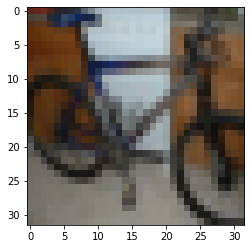

In [5]:
plt.imshow(x_train[30])

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
X_train = tf.reshape(x_train, [50000, 3072])
X_test = tf.reshape(x_test, [10000, 3072])

In [9]:
X_train.shape

TensorShape([50000, 3072])

In [10]:
X_train = tf.cast(X_train, tf.float32)/200
X_test = tf.cast(X_test, tf.float32)/200

### Sequential Model

In [11]:
# membuat model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation = 'relu', input_dim = 3072),    
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(num_class, activation = 'softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                98336     
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 100)               6500      
                                                                 
Total params: 106,948
Trainable params: 106,948
Non-trainable params: 0
_________________________________________________________________


In [13]:
# mengatur configurasi model

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4),
    loss = tf.keras.losses.categorical_crossentropy,
    metrics =['accuracy']
)

In [19]:
# melakukan training data

model.fit(
    X_train, Y_train,
    epochs = 10, steps_per_epoch = 15,
    validation_data=(X_test, Y_test)
)

Epoch 1/10
15/15 [==============================] - 1s 77ms/step - loss: 3.8606 - accuracy: 0.1200 - val_loss: 3.8819 - val_accuracy: 0.1191
Epoch 2/10
15/15 [==============================] - 1s 54ms/step - loss: 3.8519 - accuracy: 0.1221 - val_loss: 3.8746 - val_accuracy: 0.1208
Epoch 3/10
15/15 [==============================] - 1s 79ms/step - loss: 3.8438 - accuracy: 0.1237 - val_loss: 3.8683 - val_accuracy: 0.1212
Epoch 4/10
15/15 [==============================] - 1s 77ms/step - loss: 3.8364 - accuracy: 0.1244 - val_loss: 3.8610 - val_accuracy: 0.1225
Epoch 5/10
15/15 [==============================] - 1s 75ms/step - loss: 3.8289 - accuracy: 0.1262 - val_loss: 3.8546 - val_accuracy: 0.1251
Epoch 6/10
15/15 [==============================] - 1s 72ms/step - loss: 3.8223 - accuracy: 0.1268 - val_loss: 3.8475 - val_accuracy: 0.1251
Epoch 7/10
15/15 [==============================] - 1s 75ms/step - loss: 3.8141 - accuracy: 0.1279 - val_loss: 3.8430 - val_accuracy: 0.1234
Epoch 8/10
15

### Model Saving (Menyimpan Model)

In [15]:
model.save('model/posttest8.h5')

In [16]:
model.saved = tf.keras.models.load_model('model/posttest8.h5')

### Menguji Model

In [17]:
# menguji model dengan model evaluation/evaluasi

score = model.evaluate(X_test, Y_test, batch_size=32)

313/313 [==============================] - 1s 2ms/step - loss: 3.8929 - accuracy: 0.1187


In [18]:
# menguji model dengan model prediction/prediksi

result = model.predict(X_test)
result.shape

313/313 [==============================] - 1s 2ms/step


(10000, 100)